# Assignment 7: MRI Connectivity Analysis
## Computational Methods in Psychology and Neuroscience
### Psychology 4215/7215 --- Fall 2023

# Objectives

Upon completion of this assignment, the student will have:

A. Loaded MRI connectivity data for rest and BART (the balloon analog risk task)

B. Compared functional connectivity between the two tasks


# Assignment

* Write code in a Jupyter notebook (after making a copy and renaming it to have your userid in the title --- e.g., A07_MRI_Connectivity_Analysis_mst3k).

## Details

The goal of this assignment is to visualize differences in functional connectivity between rest and a task (in this case the task is the Balloon Analog Risk Task, or BART). 

I have preprocessed the data into separate time series for regions defined by the Harvard--Oxford database and provided them as a download from Canvas (the filename is `Rest_BART_time_series.npz`, which is a compressed numpy file.) You can see the code I used to preprocess the data in the first handful of cells.

Your assignment is to:

- Read in the time series data (code is provided for that)
- Calculate correlation matrices for the rest and BART time series
- Plot the correlation matrices
- Plot the connectivity graphs for Rest, BART, and Rest-BART
- Discuss what you found
  
* ***When you are done with the analysis, save this notebook as HTML (`File -> Download as -> HTML`) and upload it to the matching assignment on Canvas.***  

In [18]:
# Load some required modules

# import some useful libraries
import numpy as np                # numerical analysis linear algebra
import pandas as pd               # efficient tables
import matplotlib.pyplot as plt   # plotting
from scipy import stats
import os

# import nilearn stuff
from nilearn import plotting, image
from nilearn.maskers import NiftiLabelsMasker
from nilearn import datasets
from nilearn.connectome import ConnectivityMeasure

In [19]:
# load the Harvard Oxford atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm',
                                             symmetric_split=True)
atlas_filename = atlas.maps
labels = atlas.labels

In [20]:
# extract the coordinates of the atlas regions
coords = plotting.find_parcellation_cut_coords(
    labels_img=atlas_filename)

In [21]:
# Here's what I ran to load the resting data timeseries
"""
masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

# define the functional data
epi_file = 's042m.rest.np.preproc.nii.gz'

# calculate the average time_series for each region
time_series_rest = masker.fit_transform(epi_file)
"""

'\nmasker = NiftiLabelsMasker(\n    labels_img=atlas_filename,\n    standardize="zscore_sample",\n    standardize_confounds="zscore_sample",\n    memory="nilearn_cache",\n    verbose=5,\n)\n\n# define the functional data\nepi_file = \'s042m.rest.np.preproc.nii.gz\'\n\n# calculate the average time_series for each region\ntime_series_rest = masker.fit_transform(epi_file)\n'

In [22]:
# Here's what I ran to load the BART data timeseries
"""
masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

# define the functional data
epi_file = 's042m.BART.np.preproc.nii.gz'

# calculate the average time_series for each region
time_series_bart = masker.fit_transform(epi_file)
"""

'\nmasker = NiftiLabelsMasker(\n    labels_img=atlas_filename,\n    standardize="zscore_sample",\n    standardize_confounds="zscore_sample",\n    memory="nilearn_cache",\n    verbose=5,\n)\n\n# define the functional data\nepi_file = \'s042m.BART.np.preproc.nii.gz\'\n\n# calculate the average time_series for each region\ntime_series_bart = masker.fit_transform(epi_file)\n'

In [23]:
# Here's how I saved it out
"""
np.savez_compressed('Rest_BART_time_series.npz', 
                    rest=time_series_rest,
                    bart=time_series_bart)
"""

"\nnp.savez_compressed('Rest_BART_time_series.npz', \n                    rest=time_series_rest,\n                    bart=time_series_bart)\n"

In [24]:
os.chdir('/Users/Samantha/Desktop')

# And here's how you read it in
ts = np.load('Rest_BART_time_series.npz')
time_series_rest = ts['rest']
time_series_bart = ts['bart']

In [25]:
print('Rest:', time_series_rest.shape)
print('BART:', time_series_bart.shape)
nsamps = min(len(time_series_rest), len(time_series_bart))
print(nsamps)

# looks like we need to cut off the tail end of the rest,
# so that our correlations are comparable
time_series_rest = time_series_rest[:nsamps, :]

Rest: (594, 96)
BART: (352, 96)
352


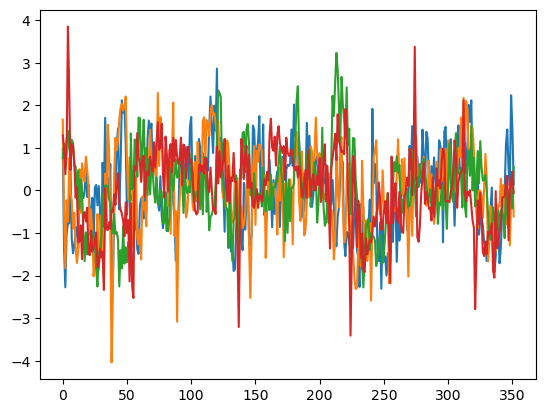

In [26]:
# let's plot a couple to see what they are like
plt.plot(time_series_bart[:,2]);
plt.plot(time_series_bart[:,15]);
plt.plot(time_series_rest[:,2]);
plt.plot(time_series_rest[:,15]);

## Calculate the Correlations

You now should calculate the correlations for the two time series datasets making use of `ConnectivityMeasure` and plot each one with `plot_matrix`.

Don't forget to zero out the diagonal with `fill_diagonal`.

/Users/Samantha/anaconda3/envs/smile/lib/python3.11/site-packages/nilearn/plotting/matrix_plotting.py:331: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


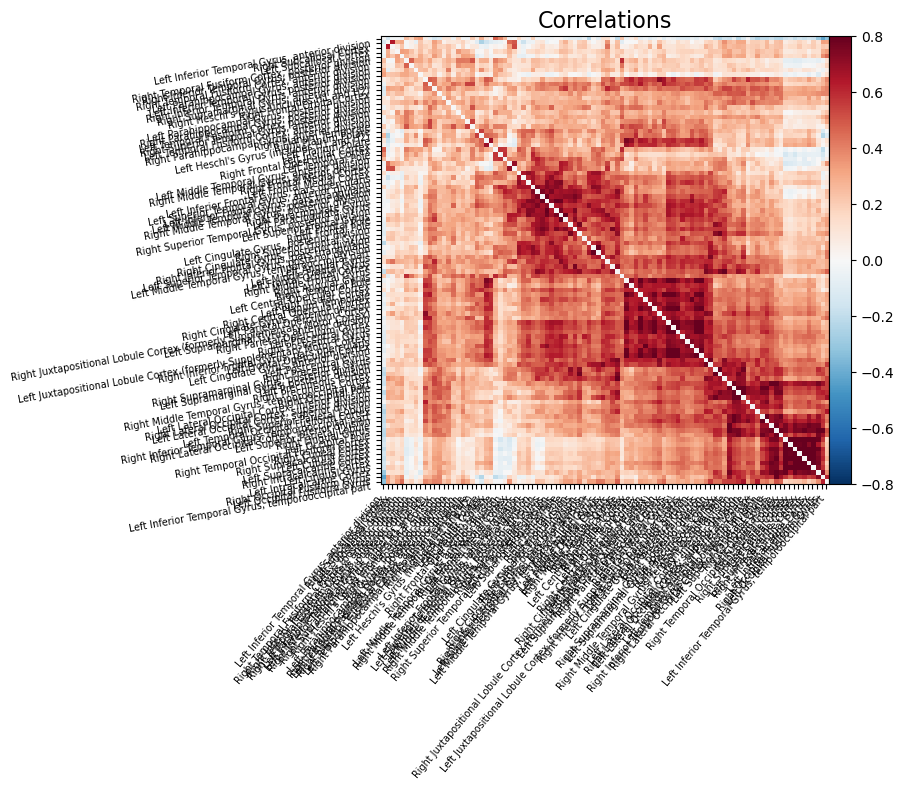

In [27]:
# Calculate the Connectivity for Rest

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
rest_correlation_matrix = correlation_measure.fit_transform([time_series_rest])[0]

# zero out the main diagonal

np.fill_diagonal(rest_correlation_matrix, 0)

# plot the correlation matrix

plotting.plot_matrix(
    rest_correlation_matrix,
    figure=(10, 8),
    labels=labels[1:],
    vmax=0.8,
    vmin=-0.8,
    title="Correlations",
    reorder=True,
)


/Users/Samantha/anaconda3/envs/smile/lib/python3.11/site-packages/nilearn/plotting/matrix_plotting.py:331: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


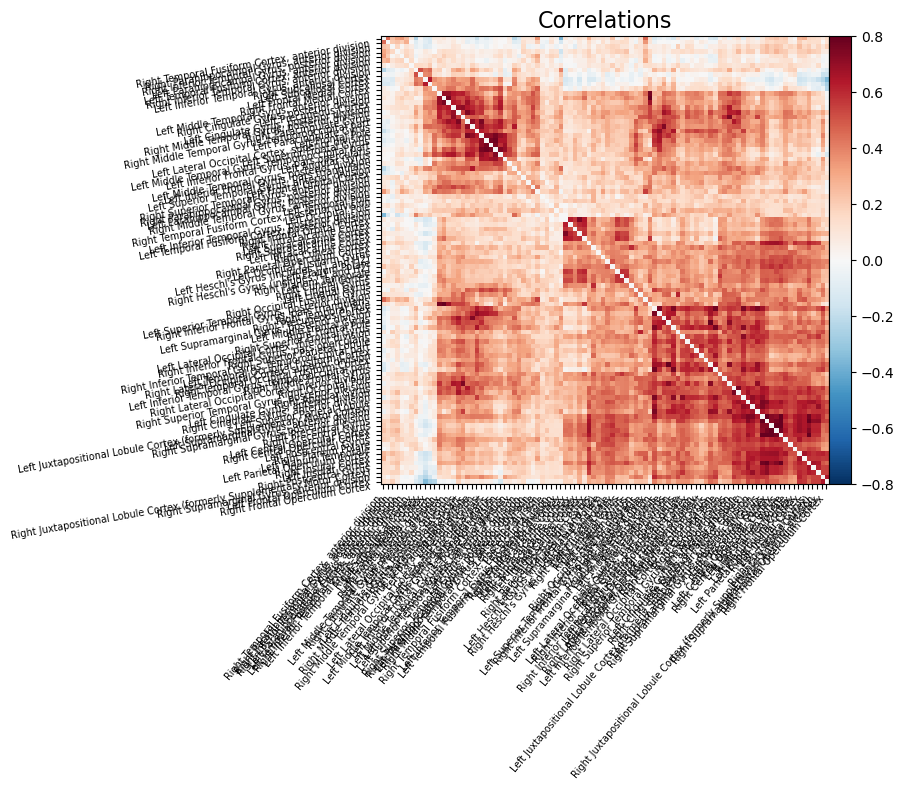

In [28]:
# Calculate the Connectivity for BART

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
bart_correlation_matrix = correlation_measure.fit_transform([time_series_bart])[0]

# zero out the main diagonal

np.fill_diagonal(bart_correlation_matrix, 0)

# plot the correlation matrix

plotting.plot_matrix(
    bart_correlation_matrix,
    figure=(10, 8),
    labels=labels[1:],
    vmax=0.8,
    vmin=-0.8,
    title="Correlations",
    reorder=True,
)


## Connectome plots

Now that we have the pairwise correlations, we can plot the connectivity with the `plot_connectome` method. 

You'll want to apply an `edge_threshold="99%"` to make it so only the most connected areas are included.

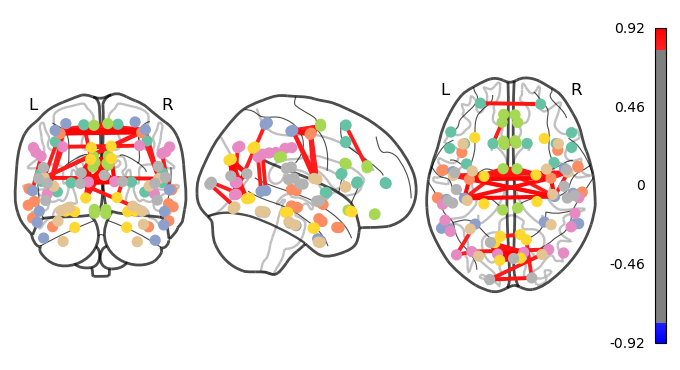

In [29]:
# Connectome plot of Rest

coords = plotting.find_parcellation_cut_coords(
    labels_img=atlas_filename)

plotting.plot_connectome(
    rest_correlation_matrix, coords, 
    edge_threshold="99%", colorbar=True
)

plotting.show()

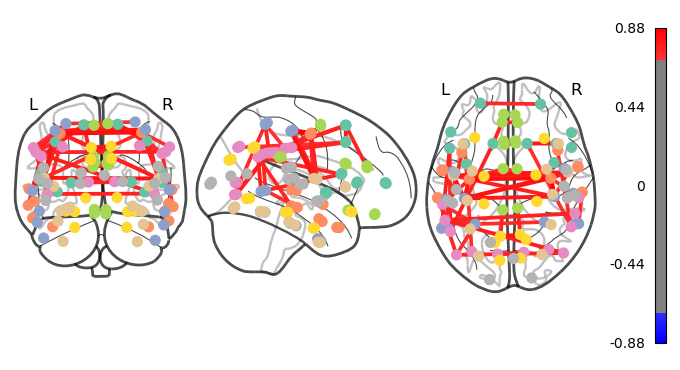

In [30]:
# Connectome plot of BART

coords = plotting.find_parcellation_cut_coords(
    labels_img=atlas_filename)

plotting.plot_connectome(
    bart_correlation_matrix, coords, 
    edge_threshold="99%", colorbar=True
)

plotting.show()

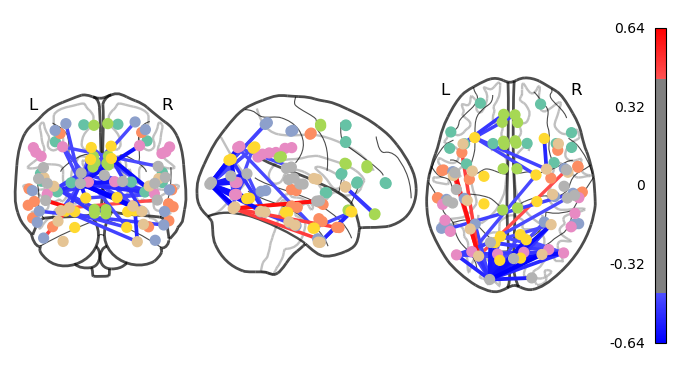

In [31]:
# Connectome plot of BART - Rest

new_matrix = bart_correlation_matrix - rest_correlation_matrix

coords = plotting.find_parcellation_cut_coords(
    labels_img=atlas_filename)

plotting.plot_connectome(
    new_matrix, coords, 
    edge_threshold="99%", colorbar=True
)

plotting.show()

## Discussion

- Please write two or three bullet points describing what you found.
- What regions were most connected at rest? What about during the BART?
- What regions were most different between rest and BART?

At rest, there are connections beteen the left and right hemispheres in the anterior region the brain, the mid-brain and the posterior region. Most of these connections appear to be in the mid-brain, and all of them are in the dorsal (top) half of the brain rather than the ventral (bottom) half. During the BART, most connectivity is also in the dorsal half, and there are many connections in the mid-brain and posterior region of the brain. During BART, there seems to be greater connectivity between areas across different locations, whereas at rest most of the connectivity seems to be between nearby areas. As shown in the BART-Rest plot, the task-based fMRI (BART) has lower connectivity than resting state in the posterior region (blue areas). Also shown in this plot, the resting state appears to have lower connectivity than BART in some ventral mid-brain regions (red areas). 